# TP3 - Fouille de de Données
>REUX Charly / THOMAS Matilin

## Imports et installations

In [ ]:
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install impyute
!pip install sklearn

ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/base_command.py", line 180, in _main
    status = self.run(options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/req_command.py", line 199, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/install.py", line 385, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/comm

In [ ]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from impyute.imputation.cs import mice
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import brier_score_loss
from sklearn.metrics import f1_score
pd.set_option('display.max_rows', 100)

## 1.Exploratory Data Analysis

### 1. and 2. Data Acquisition and Description

In [ ]:
dfTrain = pd.read_csv("adult_traindata.csv")
dfTest= pd.read_csv("adult_testdata.csv")
dfAll = pd.concat([dfTrain,dfTest])
dfAll

,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
16276,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K
16277,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
16278,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [ ]:
dfTrain

,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
dfTest

,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
3,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
16276,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K
16277,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
16278,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


### 3. Data Analysis

In [ ]:
# adding a new colum with 1 if income >50k
dfTmp = dfAll.copy()
dfTmp = (pd.get_dummies(dfTmp["Income"]))
dfTmp = dfTmp.iloc[:,1]
dfAll["Income"]=dfTmp
#re-indexing
dfAll = dfAll.reset_index()

In [ ]:
sb.set_theme(style="ticks")

#### Describe

In [ ]:
dfDesc = dfAll.describe()
dfDesc

,index,Age,fnlwgt,EducationNum,CapitalGain,CapitalLoss,HoursPerWeek,Income
count,48840.000000,48840.000000,4.884000e+04,48840.000000,48840.000000,48840.000000,48840.000000,48840.000000
mean,13566.166667,38.643857,1.896657e+05,10.078092,1079.067301,87.505897,40.422400,0.239292
std,8999.200723,13.710652,1.056048e+05,2.570954,7452.168393,403.012415,12.391697,0.426655
min,0.000000,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,6104.750000,28.000000,1.175535e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,12209.500000,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,20349.250000,48.000000,2.376472e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,32559.000000,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


#### General distribution

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

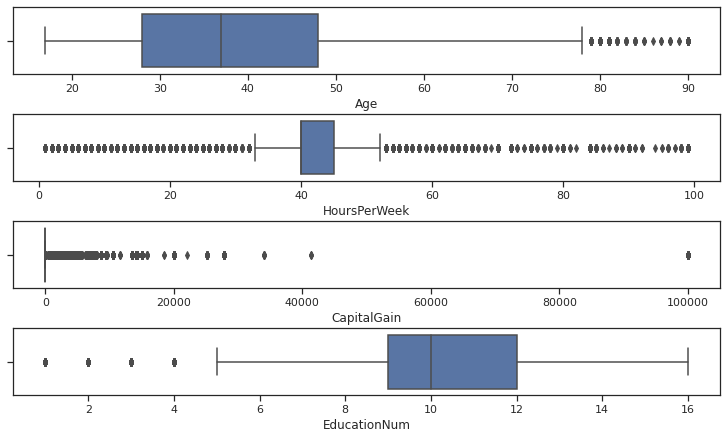

In [ ]:
fig, axs = plt.subplots(nrows=4,figsize=(10,6))
sb.boxplot(dfAll["Age"],ax=axs[0])
sb.boxplot(dfAll["HoursPerWeek"],ax=axs[1])
sb.boxplot(dfAll["CapitalGain"],ax=axs[2])
sb.boxplot(dfAll["EducationNum"],ax=axs[3])
fig.tight_layout(pad=0.3)

#### Income depending on gender

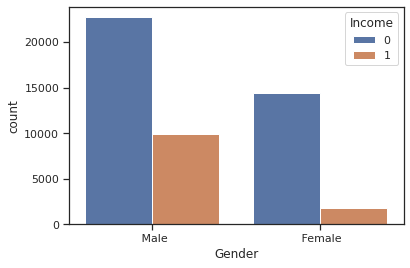

In [ ]:
sb.countplot(hue="Income",x="Gender",data=dfAll)

#### Number of people with income >50k depending on the Age

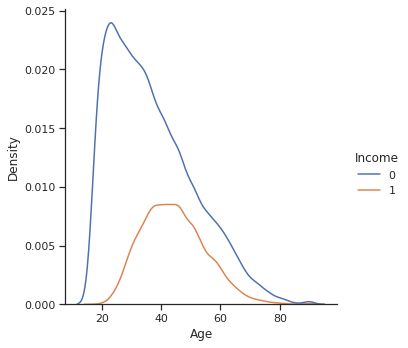

In [ ]:

sb.displot(x="Age",hue="Income",data=dfAll,kind="kde")

#### Income depending on hoursWorked per week

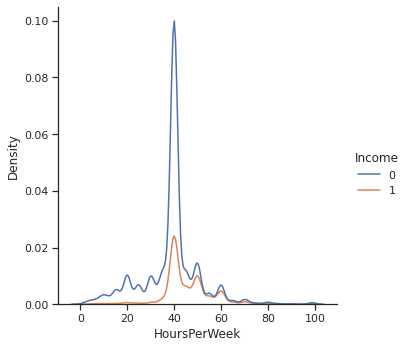

In [ ]:
sb.displot(x="HoursPerWeek",hue="Income",data=dfAll,kind="kde")

#### Same statistic but with the gender

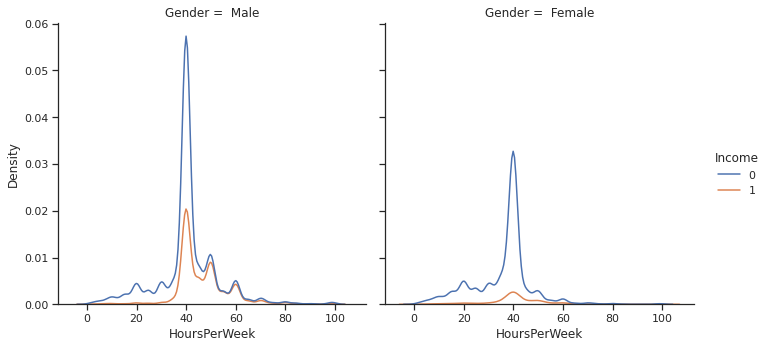

In [ ]:
sb.displot(x="HoursPerWeek",hue="Income",data=dfAll,kind="kde", col="Gender")

#### Other statistics depending on Income and Gender

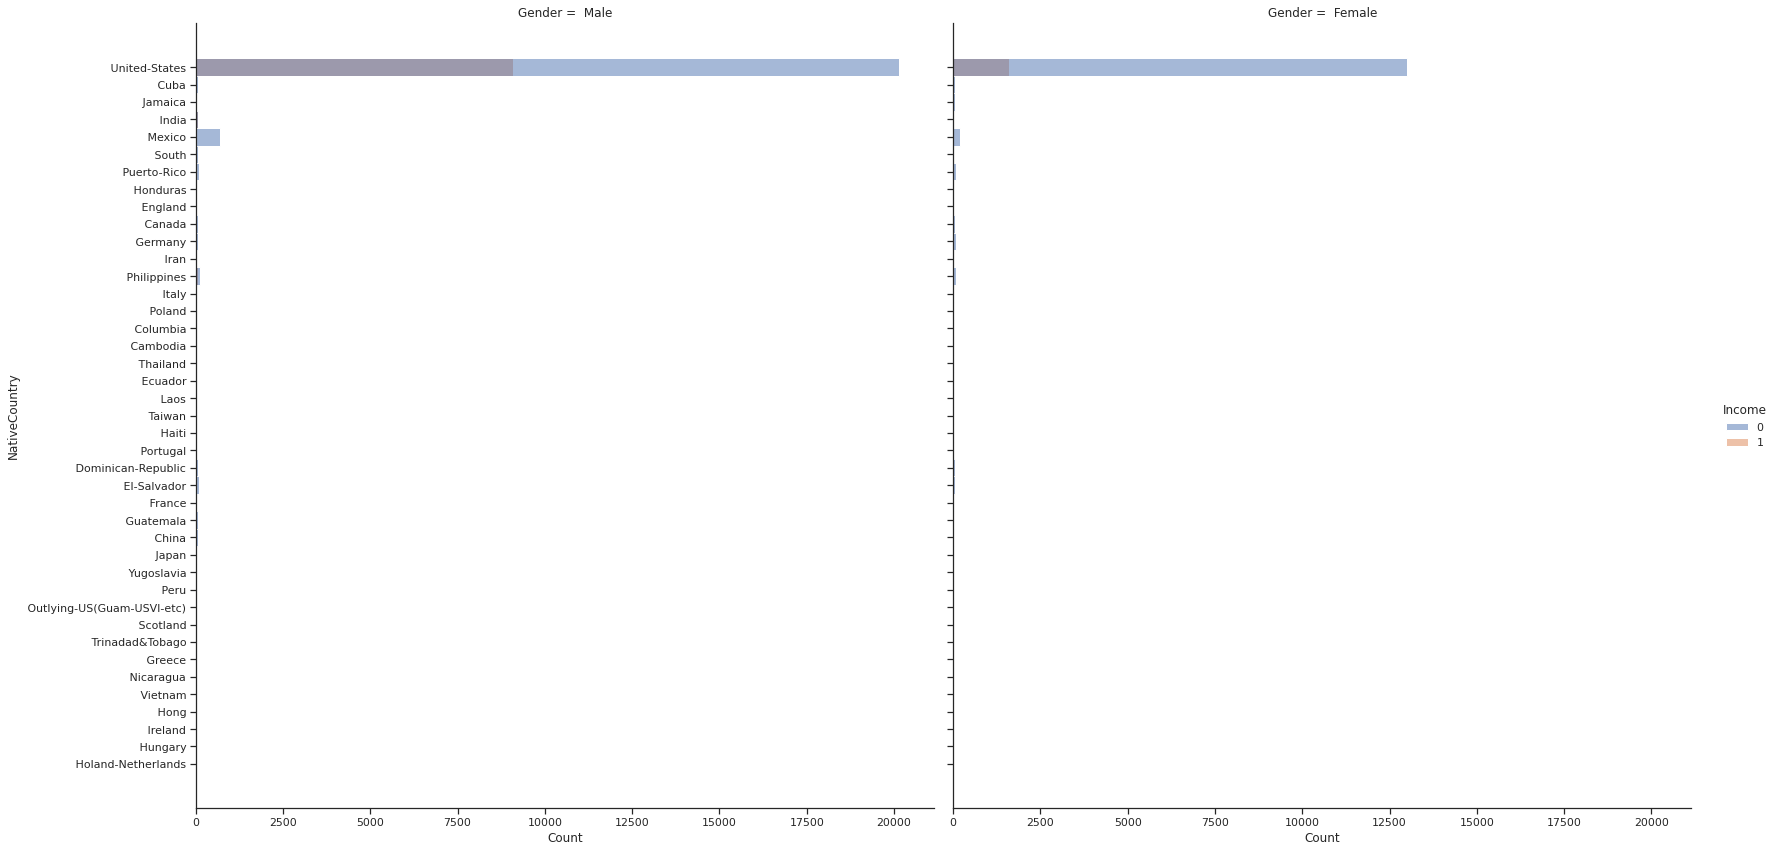

In [ ]:
sb.displot(y="NativeCountry",hue="Income", data=dfAll, col = "Gender", kind="hist", height=12)

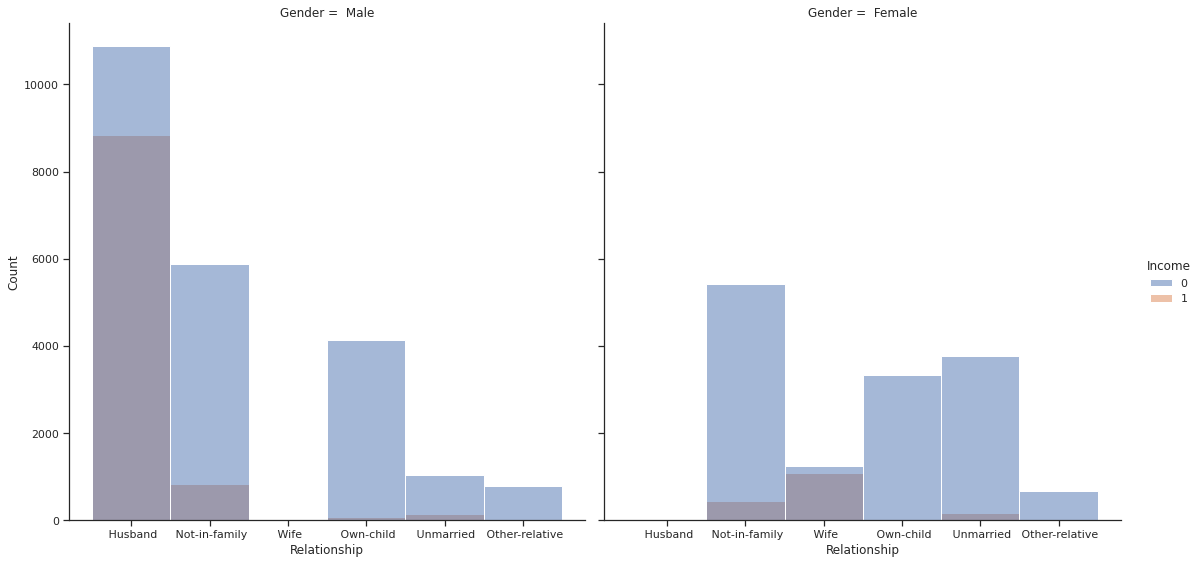

In [ ]:
sb.displot(data= dfAll, x="Relationship", hue="Income", col= "Gender", height=8)

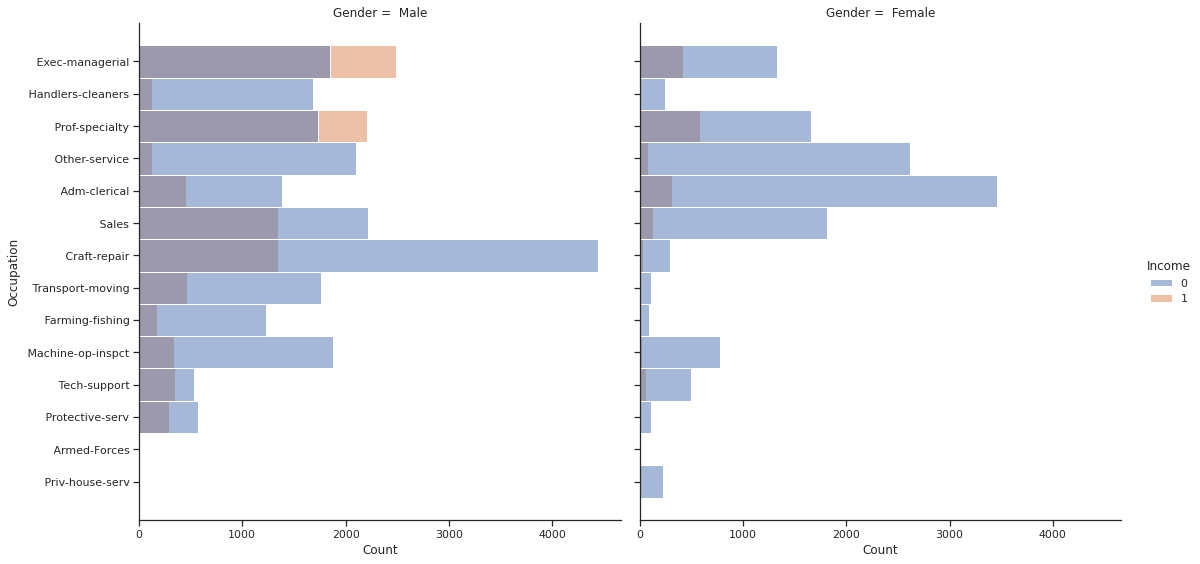

In [ ]:
sb.displot(data=dfAll, y="Occupation", hue="Income",col="Gender", height=8)

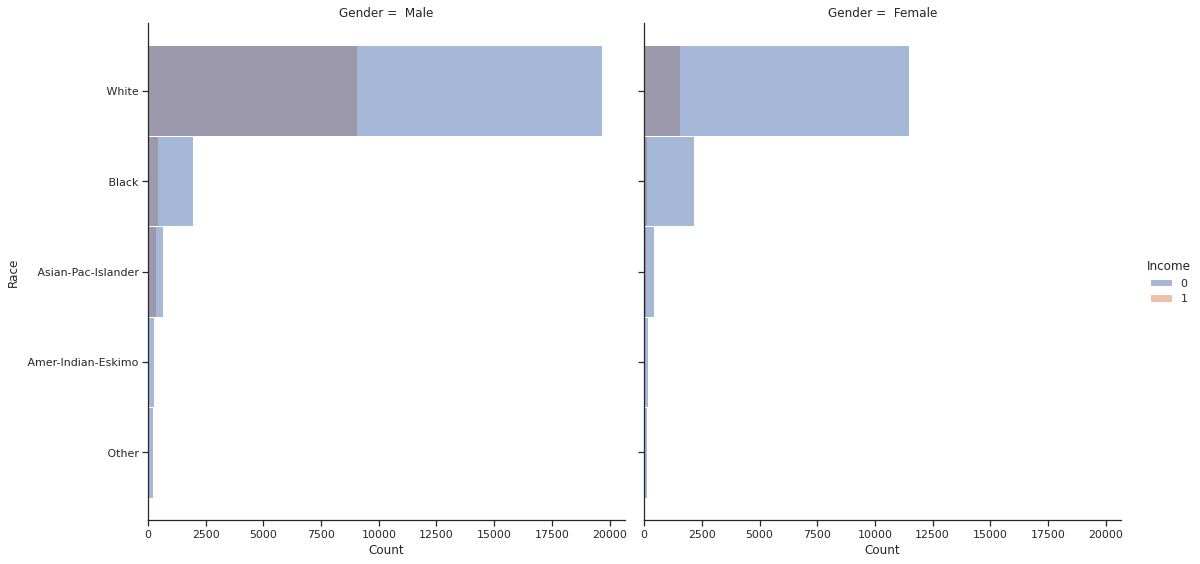

In [ ]:
sb.displot(data=dfAll, y="Race", hue="Income", col="Gender", height= 8)

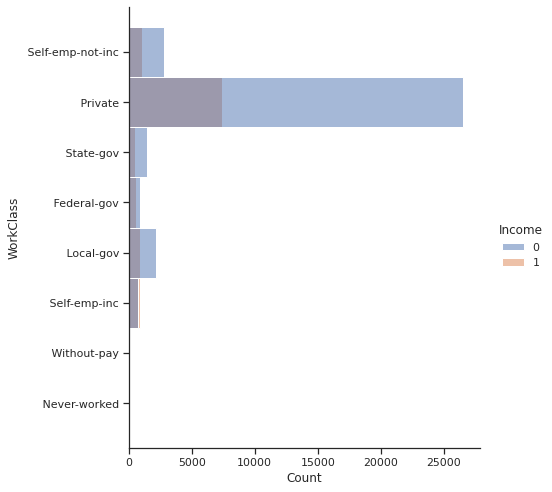

In [ ]:
sb.displot(data=dfAll,y="WorkClass",hue="Income", height=7)

#### Correlation matrix between all the values with one hot encoding

In [ ]:
categories=["Income","WorkClass","Education","MaritalStatus","Occupation","Relationship","Race","Gender","NativeCountry"]
dfMatrix = pd.get_dummies(dfAll,prefix_sep="_",columns=categories)


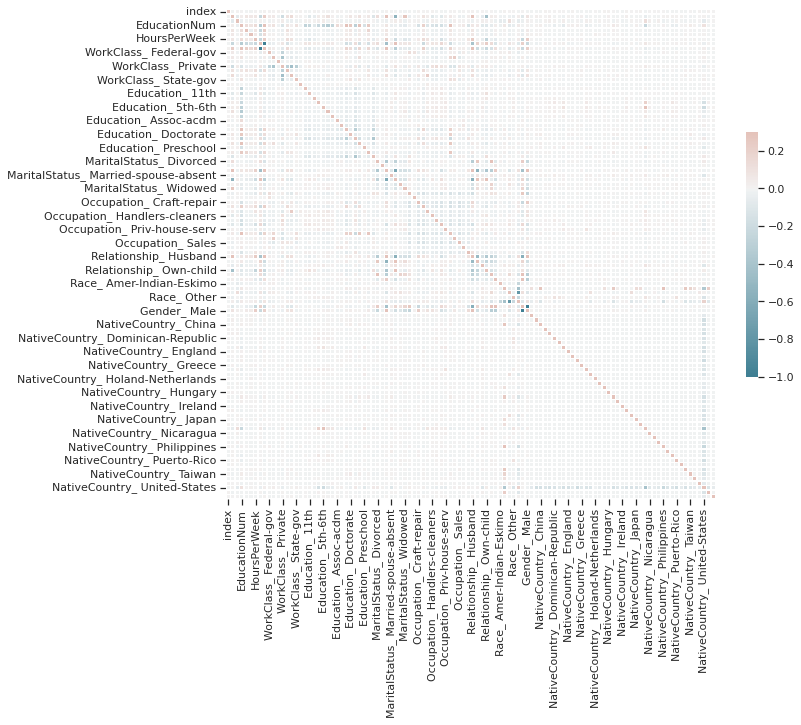

In [ ]:
corr = dfMatrix.corr()

f, ax = plt.subplots(figsize=(11, 9))

cmap = sb.diverging_palette(220, 20, as_cmap=True)

sb.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
dfMatrix

,index,Age,fnlwgt,EducationNum,CapitalGain,CapitalLoss,HoursPerWeek,Income_0,Income_1,WorkClass_ Federal-gov,WorkClass_ Local-gov,WorkClass_ Never-worked,WorkClass_ Private,WorkClass_ Self-emp-inc,WorkClass_ Self-emp-not-inc,WorkClass_ State-gov,WorkClass_ Without-pay,Education_ 10th,Education_ 11th,Education_ 12th,Education_ 1st-4th,Education_ 5th-6th,Education_ 7th-8th,Education_ 9th,Education_ Assoc-acdm,Education_ Assoc-voc,Education_ Bachelors,Education_ Doctorate,Education_ HS-grad,Education_ Masters,Education_ Preschool,Education_ Prof-school,Education_ Some-college,MaritalStatus_ Divorced,MaritalStatus_ Married-AF-spouse,MaritalStatus_ Married-civ-spouse,MaritalStatus_ Married-spouse-absent,MaritalStatus_ Never-married,MaritalStatus_ Separated,MaritalStatus_ Widowed,...,NativeCountry_ Canada,NativeCountry_ China,NativeCountry_ Columbia,NativeCountry_ Cuba,NativeCountry_ Dominican-Republic,NativeCountry_ Ecuador,NativeCountry_ El-Salvador,NativeCountry_ England,NativeCountry_ France,NativeCountry_ Germany,NativeCountry_ Greece,NativeCountry_ Guatemala,NativeCountry_ Haiti,NativeCountry_ Holand-Netherlands,NativeCountry_ Honduras,NativeCountry_ Hong,NativeCountry_ Hungary,NativeCountry_ India,NativeCountry_ Iran,NativeCountry_ Ireland,NativeCountry_ Italy,NativeCountry_ Jamaica,NativeCountry_ Japan,NativeCountry_ Laos,NativeCountry_ Mexico,NativeCountry_ Nicaragua,NativeCountry_ Outlying-US(Guam-USVI-etc),NativeCountry_ Peru,NativeCountry_ Philippines,NativeCountry_ Poland,NativeCountry_ Portugal,NativeCountry_ Puerto-Rico,NativeCountry_ Scotland,NativeCountry_ South,NativeCountry_ Taiwan,NativeCountry_ Thailand,NativeCountry_ Trinadad&Tobago,NativeCountry_ United-States,NativeCountry_ Vietnam,NativeCountry_ Yugoslavia
0,0,50,83311,13,0,0,13,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,38,215646,9,0,0,40,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2,53,234721,7,0,0,40,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,3,28,338409,13,0,0,40,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,37,284582,14,0,0,40,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48835,16275,39,215419,13,0,0,36,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
48836,16276,64,321403,9,0,0,40,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
48837,16277,38,374983,13,0,0,50,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
48838,16278,44,83891,13,5455,0,40,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## 2. Feature Engineering

### 1. Dealing with missing value

In [ ]:
dfMissing = dfAll.isnull().sum()
print("Number of rows : " + str(dfMissing["index"].size))
print("Missing Data per colum:")
dfMissing

Number of rows : 1
Missing Data per colum:


index               0
Age                 0
WorkClass        2799
fnlwgt              0
Education           0
EducationNum        0
MaritalStatus       0
Occupation       2809
Relationship        0
Race                0
Gender              0
CapitalGain         0
CapitalLoss         0
HoursPerWeek        0
NativeCountry     857
Income              0
dtype: int64

In [ ]:
dfAll["EducationNum"].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8])

>In this part, we start by changing all the variables by making them numerical, so that we can use the MICE algorythm to predict the missing values.
>
>MICE stands for Multivariable Imputation By Chained Equation, the way it works is as follows:
>
>*MICE can impute missing values in datasets with continuous, binary, and categorical attributes by using a different model for each attribute* - [Related Article](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0254720)

In [ ]:
#dfAll = dfAll.dropna()
from impyute.imputation.cs import mice

WorkClasslabels = dfAll['WorkClass'].unique().tolist()
Educationlabels = dfAll['Education'].unique().tolist()
MaritalStatuslabels = dfAll['MaritalStatus'].unique().tolist()
Occupationlabels = dfAll['Occupation'].unique().tolist()
Relationshiplabels = dfAll['Relationship'].unique().tolist()
Racelabels = dfAll['Race'].unique().tolist()
Genderlabels = dfAll['Gender'].unique().tolist()
NativeCountrylabels = dfAll['NativeCountry'].unique().tolist()

mappingWorkClass = dict(zip(WorkClasslabels,range(len(WorkClasslabels))))
mappingEducation = dict(zip(Educationlabels,range(len(Educationlabels))))
mappingMaritalStatus = dict(zip(MaritalStatuslabels,range(len(MaritalStatuslabels))))
mappingOccupation = dict(zip(Occupationlabels,range(len(Occupationlabels))))
mappingRelationship = dict(zip(Relationshiplabels,range(len(Relationshiplabels))))
mappingRace = dict(zip(Racelabels,range(len(Racelabels))))
mappingGender = dict(zip(Genderlabels,range(len(Genderlabels))))
mappingNativeCountry = dict(zip(NativeCountrylabels,range(len(NativeCountrylabels))))

dfAll.replace({'WorkClass':mappingWorkClass},inplace=True)
dfAll.replace({'Education':mappingEducation},inplace=True)
dfAll.replace({'MaritalStatus':mappingMaritalStatus},inplace=True)
dfAll.replace({'Occupation':mappingOccupation},inplace=True)
dfAll.replace({'Relationship':mappingRelationship},inplace=True)
dfAll.replace({'Race':mappingRace},inplace=True)
dfAll.replace({'Gender':mappingGender},inplace=True)
dfAll.replace({'NativeCountry':mappingNativeCountry},inplace=True)


dfAll.Age = dfAll.Age.astype(float)
dfAll.WorkClass = dfAll.WorkClass.astype(float)
dfAll.fnlwgt = dfAll.fnlwgt.astype(float)
dfAll.Education = dfAll.Education.astype(float)
dfAll.EducationNum = dfAll.EducationNum.astype(float)
dfAll.MaritalStatus = dfAll.MaritalStatus.astype(float)
dfAll.Occupation = dfAll.Occupation.astype(float)
dfAll.Relationship = dfAll.Relationship.astype(float)
dfAll.Race = dfAll.Race.astype(float)
dfAll.Gender = dfAll.Gender.astype(float)
dfAll.CapitalGain = dfAll.CapitalGain.astype(float)
dfAll.CapitalLoss = dfAll.CapitalLoss.astype(float)
dfAll.HoursPerWeek = dfAll.HoursPerWeek.astype(float)
dfAll.NativeCountry = dfAll.NativeCountry.astype(float)
dfAll.Income = dfAll.Income.astype(float)

dfAll.Occupation = dfAll.Occupation.replace(11.0,np.nan)
dfAll.WorkClass = dfAll.WorkClass.replace(5.0,np.nan)
dfAll.NativeCountry = dfAll.NativeCountry.replace(4.0, np.nan)
dfAll = mice(dfAll.values)
dfAll = pd.DataFrame(data=dfAll, columns=["index","Age","WorkClass","fnlwgt","Education","EducationNum","MaritalStatus","Occupation","Relationship","Race","Gender","CapitalGain","CapitalLoss","HoursPerWeek","NativeCountry","Income"])
dfAll['index']=dfAll['index'].apply (lambda x: round(x))
dfAll['Age']=dfAll['Age'].apply (lambda x: round(x))
dfAll['WorkClass']=dfAll['WorkClass'].apply (lambda x: round(x))
dfAll['fnlwgt']=dfAll['fnlwgt'].apply (lambda x: round(x))
dfAll['Education']=dfAll['Education'].apply (lambda x: round(x))
dfAll['EducationNum']=dfAll['EducationNum'].apply (lambda x: round(x))
dfAll['MaritalStatus']=dfAll['MaritalStatus'].apply (lambda x: round(x))
dfAll['Occupation']=dfAll['Occupation'].apply (lambda x: round(x))
dfAll['Relationship']=dfAll['Relationship'].apply (lambda x: round(x))
dfAll['Race']=dfAll['Race'].apply (lambda x: round(x))
dfAll['Gender']=dfAll['Gender'].apply (lambda x: round(x))
dfAll['CapitalGain']=dfAll['CapitalGain'].apply (lambda x: round(x))
dfAll['CapitalLoss']=dfAll['CapitalLoss'].apply (lambda x: round(x))
dfAll['HoursPerWeek']=dfAll['HoursPerWeek'].apply (lambda x: round(x))
dfAll['NativeCountry']=dfAll['NativeCountry'].apply (lambda x: round(x))
dfAll['Income']=dfAll['Income'].apply (lambda x: round(x))
dfAll

,index,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,0,50,0,83311,0,13,0,0,0,0,0,0,0,13,0,0
1,1,38,1,215646,1,9,1,1,1,0,0,0,0,40,0,0
2,2,53,1,234721,2,7,0,1,0,1,0,0,0,40,0,0
3,3,28,1,338409,0,13,0,2,2,1,1,0,0,40,1,0
4,4,37,1,284582,3,14,0,0,2,0,1,0,0,40,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48835,16275,39,1,215419,0,13,1,2,1,0,1,0,0,36,0,0
48836,16276,64,2,321403,1,9,6,5,5,1,0,0,0,40,0,0
48837,16277,38,1,374983,0,13,0,2,0,0,0,0,0,50,0,0
48838,16278,44,1,83891,0,13,1,4,3,2,0,5455,0,40,0,0


### 2. Combining categories
>We decided to use the one hot encoder to deal with workclass and maritalstatus.And chose to combine the other columns in two different ones.

In [ ]:
#combining gender, race and education in one colum and dropping the former colums 
dfAll["GenRaceEdu"] = (dfAll["Gender"].astype("str")+"_"+ dfAll["Race"].astype("str")+"_"+ dfAll["Education"].astype("str"))
dfAll = dfAll.drop(["Gender","Race","Education"],axis=1)

#Doing the same with Occupation and NativeCountry
dfAll["CountryOccup"] = (dfAll["NativeCountry"].astype("str")+"_"+ dfAll["Occupation"].astype("str"))
dfAll = dfAll.drop(["NativeCountry","Occupation"],axis=1)


#One hot encoding on workclass and MaritalStatus
categories=["WorkClass","MaritalStatus"]
dfAll = pd.get_dummies(dfAll,prefix_sep="_",columns=categories)

In [ ]:
dfAll

,index,Age,fnlwgt,EducationNum,Relationship,CapitalGain,CapitalLoss,HoursPerWeek,Income,GenRaceEdu,CountryOccup,WorkClass_0,WorkClass_1,WorkClass_2,WorkClass_3,WorkClass_4,WorkClass_6,WorkClass_7,WorkClass_8,MaritalStatus_0,MaritalStatus_1,MaritalStatus_2,MaritalStatus_3,MaritalStatus_4,MaritalStatus_5,MaritalStatus_6
0,0,50,83311,13,0,0,0,13,0,0_0_0,0_0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,38,215646,9,1,0,0,40,0,0_0_1,0_1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2,53,234721,7,0,0,0,40,0,0_1_2,0_1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,3,28,338409,13,2,0,0,40,0,1_1_0,1_2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,4,37,284582,14,2,0,0,40,0,1_0_3,0_0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48835,16275,39,215419,13,1,0,0,36,0,1_0_0,0_2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
48836,16276,64,321403,9,5,0,0,40,0,0_1_1,0_5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
48837,16277,38,374983,13,0,0,0,50,0,0_0_0,0_2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
48838,16278,44,83891,13,3,5455,0,40,0,0_2_0,0_4,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


### 3. Binning continuous variables
>The only continuous variable that we can take care of is the age that we will cut by using the qcut function of python
>
>What the line of code does here is splitting the values into 20 equal parts and then rounding the values obtained

In [ ]:
dfAll["Age"] = pd.qcut(dfAll["Age"],q=20,labels=np.linspace(0.0, 100.0, num=20)).apply(lambda x : round(x))

### 4. Dropping irrelevant features
>We decided to drop these values because they did not seem to have a very important impact on the Income

In [ ]:
dfAll= dfAll.drop(["CapitalGain","CapitalLoss","fnlwgt","index","Relationship"],axis=1)

### 5. Transform variables into numerical variables
>In this part, we had to deal with the colum "GenRaceEdu" and "CountryOccup" that we previously created. We chose to automatically replace all values with their corresponding index on the unique list of the column

In [ ]:
GRElabels = dfAll['GenRaceEdu'].unique().tolist()
mapping = dict(zip(GRElabels,range(len(GRElabels))))
dfAll.replace({'GenRaceEdu':mapping},inplace=True)

In [ ]:
COlabels = dfAll['CountryOccup'].unique().tolist()
mapping = dict(zip(COlabels,range(len(COlabels))))
dfAll.replace({'CountryOccup':mapping},inplace=True)

## 3. Model building and evaluation

### 1.Extracting input and output vectors

In [ ]:
Y = dfAll["Income"]
X = dfAll.drop(["Income"],axis=1)
tabScores = []

### 3. Training all the classifiers on the data

#### a) Linear Regression

In [ ]:
LgReg = LogisticRegression(max_iter=2000)#obligé de changer le nombre max d'iteration sinon insuffisant
LgReg.fit(X,Y)
tabScores.append(LgReg.score(X,Y))

#### b) Support Vector Machine

In [ ]:
supp = svm.SVC()
supp.fit(X, Y)
tabScores.append(supp.score(X,Y))

 #### c) gaussian Naive bayes

In [ ]:
gaussian = GaussianNB()
gaussian.fit(X, Y)
tabScores.append(gaussian.score(X,Y))

#### d)Decision Tree

In [ ]:
dectree = tree.DecisionTreeClassifier()
dectree.fit(X, Y)
tabScores.append(dectree.score(X,Y))

#### e) Random Forest

In [ ]:
rdf = RandomForestClassifier()
rdf.fit(X, Y)
tabScores.append(rdf.score(X,Y))

>Here are the results,but because we trained our data without a distinct test set and training set, the results are not really representative of the real efficiency that the classifiers would have in a real predicting environment.

In [ ]:
tabScores

[0.8279279279279279,
 0.8161752661752661,
 0.7017403767403767,
 0.9441236691236691,
 0.9441031941031941]

#### 3.4 Training the classifiers with random split
>To prevent the results from being to biased by the test on same data as the train, we use the *train_test_split* function wich splits the data so that we can have two different sets.

In [ ]:
trainsplit, trainsplit2= train_test_split(dfAll)
trainsplit2
X1=trainsplit.drop(['Income'],axis=1)
Y1=trainsplit['Income']

X2=trainsplit2.drop(['Income'],axis=1)
Y2=trainsplit2['Income']
tabScores2 = []

#### a) Linear Regression

In [ ]:
LgReg2 = LogisticRegression(max_iter=2000)
LgReg2.fit(X1,Y1)
tabScores2.append(LgReg2.score(X2,Y2))

#### b) Support Vector Machine

In [ ]:
supp2 = svm.SVC()
supp2.fit(X1, Y1)
tabScores2.append(supp2.score(X2,Y2))

 #### c) Gaussian Naive bayes

In [ ]:
gaussian2 = GaussianNB()
gaussian2.fit(X1, Y1)
tabScores2.append(gaussian2.score(X2,Y2))

#### d) Decision Tree

In [ ]:
dectree2 = tree.DecisionTreeClassifier()
dectree2.fit(X1, Y1)
tabScores2.append(dectree2.score(X2,Y2))

#### e) Random Forest

In [ ]:
rdf2 = RandomForestClassifier()
rdf2.fit(X1, Y1)
tabScores2.append(rdf2.score(X2,Y2))

>Logically, the results that we get from these test are not as good as the previous ones, and the best classifier seems to be the suport vector machine for now.

In [ ]:
tabScores2

[0.8293202293202293,
 0.8116298116298116,
 0.6983619983619984,
 0.7898443898443899,
 0.8194103194103194]

## 4. K-fold cross validation
>But the results are still not fully representative of all the data because we trained only one on part of it. To counter this we will use the **K-fold cross validation**.
>
>We decided to split our dataset in 10 and then make a mean on the obtained scores.

In [ ]:
tabScoresCrossVal = []
tabScoresCrossVal.append(cross_val_score(LgReg2, X, Y, cv=10).mean())
tabScoresCrossVal.append(cross_val_score(supp2, X, Y, cv=10).mean())
tabScoresCrossVal.append(cross_val_score(gaussian2, X, Y, cv=10).mean())
tabScoresCrossVal.append(cross_val_score(dectree2, X, Y, cv=10).mean())
tabScoresCrossVal.append(cross_val_score(rdf2, X, Y, cv=10).mean())
tabScoresCrossVal

[0.8278665028665028,
 0.815110565110565,
 0.6993857493857494,
 0.794000819000819,
 0.8192465192465193]

>Now our best classifier is the Logistic Regression.

## 5. More on model evaluation
>Our results are decent now, but we can still make them better by tuning the hyper-parameters.
>
>To do so, we will use **Grid search with cross validation**
>
>(note: the Gaussian naive Bayes parameters cannot be tweaked)
>
>\*From this part, the algorythms tend to take quite a long time to execute, so we've written down the results in the part 7

In [ ]:
Gtrainsplit, Gtrainsplit2= train_test_split(dfAll)
Gtrainsplit2
X1=Gtrainsplit.drop(['Income'],axis=1)
Y1=Gtrainsplit['Income']

X2=Gtrainsplit2.drop(['Income'],axis=1)
Y2=Gtrainsplit2['Income']
GtabScores2 = []

##### a) Logistic regression

In [ ]:
GLgReg2 = LogisticRegression()
grid=dict(C=np.logspace(0, 4, 10), penalty=['l1', 'l2'],solver=['liblinear'])
GLgReg2 = GridSearchCV(GLgReg2,grid)
GLgReg2.fit(X1,Y1)
GtabScores2.append(GLgReg2.score(X2,Y2))
print("best params: ",GLgReg2.best_params_)

best params:  {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}


##### b) Support Vector Machine

In [ ]:
Gsupp2 = svm.SVC()
grid={'C': [1,4], 'gamma': [0.01,0.001]}
Gsupp2 = GridSearchCV(Gsupp2,grid)
Gsupp2.fit(X1, Y1)
GtabScores2.append(Gsupp2.score(X2,Y2))
print("best params: ",Gsupp2.best_params_)

best params:  {'C': 4, 'gamma': 0.001}


##### c) Decision tree

In [ ]:
Gdectree2 = tree.DecisionTreeClassifier()
grid={'criterion': ['gini','entropy'], 'splitter': ["best","random"]}
Gdectree2 = GridSearchCV(Gdectree2,grid)
Gdectree2.fit(X1, Y1)
GtabScores2.append(Gdectree2.score(X2,Y2))
print("best params: ",Gdectree2.best_params_)

best params:  {'criterion': 'entropy', 'splitter': 'random'}


##### d) Random Forest

In [ ]:
Grdf2 = RandomForestClassifier()
grid={'n_estimators': [50,200,10], 'criterion': ['gini','entropy']}
Grdf2 = GridSearchCV(Grdf2,grid)
Grdf2.fit(X1, Y1)
GtabScores2.append(Grdf2.score(X2,Y2))
print("best params: ",Grdf2.best_params_)

best params:  {'criterion': 'entropy', 'n_estimators': 200}


>Here are the scores obtained on the data splitted in two.

In [ ]:
GtabScores2

[0.8190827190827191,
 0.8230139230139231,
 0.7894348894348895,
 0.8143325143325143]

>The best classifier seems to be the SVM.
>
>Now we can try the k-cross validation on these classifiers

In [ ]:
tabGScoresCrossVal = []
tabGScoresCrossVal.append(cross_val_score(GLgReg2, X, Y, cv=10).mean())
tabGScoresCrossVal.append(cross_val_score(Gsupp2, X, Y, cv=10).mean())
tabGScoresCrossVal.append(cross_val_score(gaussian2, X, Y, cv=10).mean())
tabGScoresCrossVal.append(cross_val_score(Gdectree2, X, Y, cv=10).mean())
tabGScoresCrossVal.append(cross_val_score(Grdf2, X, Y, cv=10).mean())
tabGScoresCrossVal

KeyboardInterrupt: ignored

**Notes on the results:**

The results that we obtained show that the best classifier is the SVM , so this is the one that we will use for the real case scenario. The parameters that the gridSearched algorythm found for us are {'C': 4, 'gamma': 0.001} 

### 3.Other evaluation metrics
>To verify more precisely the classifiers we are going to try 3 other evaluation metrics:
> * Average Precision Score
> * Brier Score Loss
> * F1_Score

##### a) Average_precision_score
>AP summarizes a precision-recall curve as the weighted mean of precisions achieved at each threshold, with the increase in recall from the previous threshold used as the weight:
$$ AP = \sum _{i=1} ^{10} (R_{n} - R_{n-1})P_{n} $$
>$ P_{n} $ and $ R_{n} $ are the precision and recall at the nth threshold


In [ ]:
PrectabGScoresCrossVal = []
PrectabGScoresCrossVal.append(cross_val_score(GLgReg2, X, Y, cv=10,scoring="average_precision").mean())
PrectabGScoresCrossVal.append(cross_val_score(Gsupp2, X, Y, cv=10,scoring="average_precision").mean())
PrectabGScoresCrossVal.append(cross_val_score(gaussian2, X, Y, cv=10,scoring="average_precision").mean())
PrectabGScoresCrossVal.append(cross_val_score(Gdectree2, X, Y, cv=10,scoring="average_precision").mean())
PrectabGScoresCrossVal.append(cross_val_score(Grdf2, X, Y, cv=10,scoring="average_precision").mean())
PrectabGScoresCrossVal

##### b) Brier_score_loss
>The Brier score measures the mean squared difference between the predicted probability and the actual outcome.(the lower the better)


In [ ]:
BriertabGScoresCrossVal = []
BriertabGScoresCrossVal.append(cross_val_score(GLgReg2, X, Y, cv=10,scoring="neg_brier_score").mean())
BriertabGScoresCrossVal.append(cross_val_score(Gsupp2, X, Y, cv=10,scoring="neg_brier_score").mean())
BriertabGScoresCrossVal.append(cross_val_score(gaussian2, X, Y, cv=10,scoring="neg_brier_score").mean())
BriertabGScoresCrossVal.append(cross_val_score(Gdectree2, X, Y, cv=10,scoring="neg_brier_score").mean())
BriertabGScoresCrossVal.append(cross_val_score(Grdf2, X, Y, cv=10,scoring="neg_brier_score").mean())
BriertabGScoresCrossVal

##### c) F1_score
>The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.

In [ ]:
FStabGScoresCrossVal = []
FStabGScoresCrossVal.append(cross_val_score(GLgReg2, X, Y, cv=10,scoring="f1").mean())
FStabGScoresCrossVal.append(cross_val_score(Gsupp2, X, Y, cv=10,scoring="f1").mean())
FStabGScoresCrossVal.append(cross_val_score(gaussian2, X, Y, cv=10,scoring="f1").mean())
FStabGScoresCrossVal.append(cross_val_score(Gdectree2, X, Y, cv=10,scoring="f1").mean())
FStabGScoresCrossVal.append(cross_val_score(Grdf2, X, Y, cv=10,scoring="f1").mean())
FStabGScoresCrossVal

**Notes on the results:**

After having tested these three metrics, and even tho the F1_score isn't as good, we can validate that our best classifier is the SVM.

## 6. Classification on the test dataset

### 1.Training the chosen classifier on the test dataset

#### a) Feature engineering on both train and test dataset

In [ ]:
#changing the Income colums with 1 and 0
dfTmp = dfTest.copy()
dfTmp = (pd.get_dummies(dfTmp["Income"]))
dfTmp = dfTmp.iloc[:,1]
dfTest["Income"]=dfTmp

dfTmp = dfTrain.copy()
dfTmp = (pd.get_dummies(dfTmp["Income"]))
dfTmp = dfTmp.iloc[:,1]
dfTrain["Income"]=dfTmp

In [ ]:
#Drop the nan values (Change?)
dfTest = dfTest.dropna()
dfTrain = dfTrain.dropna()

In [ ]:
            #1 - On dfTest
#combining gender, race and education in one colum and dropping the former colums 
dfTest["GenRaceEdu"] = (dfTest["Gender"].astype("str")+"_"+ dfTest["Race"].astype("str")+"_"+ dfTest["Education"].astype("str"))
dfTest = dfTest.drop(["Gender","Race","Education"],axis=1)

#Doing the same with Occupation and NativeCountry
dfTest["CountryOccup"] = (dfTest["NativeCountry"].astype("str")+"_"+ dfTest["Occupation"].astype("str"))
dfTest = dfTest.drop(["NativeCountry","Occupation"],axis=1)


#One hot encoding on workclass and MaritalStatus
categories=["WorkClass","MaritalStatus"]
dfTest = pd.get_dummies(dfTest,prefix_sep="_",columns=categories)

            #2 - On dfTrain
#combining gender, race and education in one colum and dropping the former colums 
dfTrain["GenRaceEdu"] = (dfTrain["Gender"].astype("str")+"_"+ dfTrain["Race"].astype("str")+"_"+ dfTrain["Education"].astype("str"))
dfTrain = dfTrain.drop(["Gender","Race","Education"],axis=1)

#Doing the same with Occupation and NativeCountry
dfTrain["CountryOccup"] = (dfTrain["NativeCountry"].astype("str")+"_"+ dfTrain["Occupation"].astype("str"))
dfTrain = dfTrain.drop(["NativeCountry","Occupation"],axis=1)


#One hot encoding on workclass and MaritalStatus
categories=["WorkClass","MaritalStatus"]
dfTrain = pd.get_dummies(dfTrain,prefix_sep="_",columns=categories)

In [ ]:
#Binning continuous values
dfTest["Age"] = pd.qcut(dfTest["Age"],q=20,labels=np.linspace(0.0, 100.0, num=20)).apply(lambda x : round(x))
dfTrain["Age"] = pd.qcut(dfTrain["Age"],q=20,labels=np.linspace(0.0, 100.0, num=20)).apply(lambda x : round(x))

In [ ]:
#Droping irrelevant features
OriginalIncome = dfTest["Income"]
dfTest= dfTest.drop(["CapitalGain","CapitalLoss","fnlwgt","Relationship","Income"],axis=1)
dfTrain= dfTrain.drop(["CapitalGain","CapitalLoss","fnlwgt","Relationship"],axis=1)

In [ ]:
    #1 - On dfTest
GRElabels = dfTest['GenRaceEdu'].unique().tolist()
mapping = dict(zip(GRElabels,range(len(GRElabels))))
dfTest.replace({'GenRaceEdu':mapping},inplace=True)

COlabels = dfTest['CountryOccup'].unique().tolist()
mapping = dict(zip(COlabels,range(len(COlabels))))
dfTest.replace({'CountryOccup':mapping},inplace=True)

    #2 - On dfTrain
GRElabels = dfTrain['GenRaceEdu'].unique().tolist()
mapping = dict(zip(GRElabels,range(len(GRElabels))))
dfTrain.replace({'GenRaceEdu':mapping},inplace=True)

COlabels = dfTrain['CountryOccup'].unique().tolist()
mapping = dict(zip(COlabels,range(len(COlabels))))
dfTrain.replace({'CountryOccup':mapping},inplace=True)

#### b) Training the classifier on the train data
>Now that our data is nicely formated, we can start to train the SVM classifier on it with the parameters found previously.


In [ ]:
#Vector creation
XFinal=dfTrain.drop(['Income'],axis=1)
YFinal=dfTrain['Income']

#creating and training our classifier
svmClass = svm.SVC(C=4, gamma= 0.001)
svmClass.fit(XFinal, YFinal)


### 2. Predicting the labels on the test dataset

In [ ]:
PredictedIncome=svmClass.predict(dfTest)
testFinal = dfTest.copy();
testFinal['IncomePredicted'] = PredictedIncome
testFinal["IncomeOriginal"] = OriginalIncome
testFinal

### 3. Evaluating the Accuracy

In [ ]:
accuracy_score(OriginalIncome, PredictedIncome, normalize=False)

In [ ]:
average_precision_score(OriginalIncome, PredictedIncome)

In [ ]:
brier_score_loss(OriginalIncome, PredictedIncome)

In [ ]:
f1_score(OriginalIncome, PredictedIncome, average='macro')

### Conclusion

The results that we ended up having at the beginning were not as good as we expected, out of all the 16277 entries of the table, only 12304 were nicely predicted, wich makes a ratio of 0.75. It's not bad, be it could be better, but the reason was because we did not replace the missing values still. We ended up replacing them, but did not have the time to run again all the algorithms (multiple hours) and thus the results shown here are from the old version of the program.

## 7. Some Results
5.a) best params:  {'C': 7.742636826811269, 'penalty': 'l1', 'solver': 'liblinear'}

5.b) best params:  {'C': 4, 'gamma': 0.001}

5.c) best params:  {'criterion': 'entropy', 'splitter': 'best'}

5.d) best params:  {'criterion': 'gini', 'n_estimators': 200}

5.Scores : [0.8275099513489607, 0.8287483414418398, 0.789827509951349, 0.8183989385227776]

5.kcrossScores: [0.8232861565678903,0.8235957540911102,0.7203892083149048,0.7898717381689517,0.8152145068553738]

5.averagePrecision : [0.6791929321814216,0.6778809319642506,0.5696610080485319,0.46126838474120013,0.6512616444269919]

5.brierLoss : [-0.1199905399631029,nan,-0.2381620684479536,-0.19034334895882427,-0.13004523178870125]

5.F1 : [0.5959080905565394,0.5842685842196885,0.6005387525812635,0.5562693470979518,0.6022279347400618]

